# **Automatidata project: Logistic Regression**

## TASK

The request is to build machine learning model to predict whether rider will leave generous tip or not. 

This is binary classification problem and therefore logistic regression model must be utilized.The following activities are conducted:

    1. Importing packages and dataset
    2. Data Exploration
    2. Feature Engineering
    3. Model Construction
    4. Model Evaluation
    
    
    
**Ethical considerations**

Before starting the building model the ethical considerations must be satisfied. Because this is classfication problem the evaluation must be focused to frequency of false positives and positives:

  * `False negative`: When the model says a customer will give a tip, but they actually won't.
   
  * `False positive`: When the model says a customer will not give a tip, but they actually will.  
  
Drivers who didn't receive tips will probably be upset that the app told them a customer would leave a tip. If it happened often, drivers might not trust the app.
Drivers are unlikely to pick up people who are predicted to not leave tips. Customers will have difficulty finding a taxi that will pick them up, and might get angry at the taxi company. Even when the model is correct, people who can't afford to tip will find it more difficult to get taxis, which limits the accessibility of taxi service to those who pay extra.

**How to tackle the problem?**

It's not good to disincentivize drivers from picking up customers. It could also cause a customer backlash. The problems seem to outweigh the benefits. So building such a model has potential to cause misunderstanding however
we can build a model that predicts the most generous (more than 20% of total amount) customers. This could accomplish the goal of helping taxi drivers increase their earnings from tips while preventing the wrongful exclusion of certain people from using taxis


## 1. Importing packages and dataset

In [1]:
# Data manipulation packages
import numpy as np
import pandas as pd

# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling packages
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

In [2]:
# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
pd.set_option('display.max_columns', None)
# Import predicted fares and mean distance and duration from the previous work (see "3. Automatidata project-Regression Analysis")
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

## 2. Data Exploration

In [3]:
def df_analyze(dataset):
    """
    Function is utilized to get basic descriptive stats from dataframes.
    """
    print("1. THE SHAPE OF DATASET")
    print("-------------------------")
    print(f"Number of rows: {dataset.shape[0]} \nNumber of features: {dataset.shape[1]}")
    print('\n')
    print("2. MISSING AND DUPLICATED VALUES")
    print("-------------------------")    
    for col in df0.columns:
        if dataset.isna().any().sum()==0:
            print(f"Data set doesn't contain any missing value")
            break
        elif dataset[col].isna().sum()>0:
            print(f"Number of nulls in {col} column is {dataset[col].isna().sum()}")
    print(f"Data set has {dataset.duplicated().sum()} duplication.")
    print('\n')
    print("3. DATA TYPES")
    print("-------------------------")
    print(dataset.dtypes)
    print('\n')
    print("4. SUMMARY STATISTICS")
    print("-------------------------")
    pd.set_option('display.max_columns', None)
    display(dataset.describe())

In [4]:
df_analyze(nyc_preds_means)

1. THE SHAPE OF DATASET
-------------------------
Number of rows: 22699 
Number of features: 4


2. MISSING AND DUPLICATED VALUES
-------------------------
Data set doesn't contain any missing value
Data set has 0 duplication.


3. DATA TYPES
-------------------------
Unnamed: 0          int64
mean_duration     float64
mean_distance     float64
predicted_fare    float64
dtype: object


4. SUMMARY STATISTICS
-------------------------


,Unnamed: 0,mean_duration,mean_distance,predicted_fare
count,22699.000000,22699.000000,22699.000000,22699.000000
mean,11349.000000,14.460555,2.913313,12.892842
std,6552.781216,10.080913,3.558993,9.718110
min,0.000000,0.000000,0.000000,3.159844
25%,5674.500000,8.031481,1.010000,7.161890
50%,11349.000000,11.556667,1.620000,9.441588
75%,17023.500000,17.321667,3.115625,13.844181
max,22698.000000,88.783333,33.920000,62.967275


#### Joining the two dataframes

In [5]:
df0 = df0.merge(nyc_preds_means,left_index=True,right_index=True)
df0.head()

,Unnamed: 0_x,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0_y,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0,22.847222,3.521667,16.540209
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1,24.470370,3.108889,16.423650
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2,7.250000,0.881429,6.621079
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,3,30.250000,3.700000,20.049591
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,14.616667,4.435000,15.328859


## 3. Feature Engineering

The Previous EDA analysis revealed that (see "1. Automatidata project-EDA Analysis") riders generally do not pay tip when they make payment with cash. Therefore the model will be build on the riders who pay with credit card. Under feature engineering the following tasks are conducted:

1. Isolation of riders who pay with credit card.
2. `Tip percent` column.
3. `Generous` column by filtering tip percent column.
4. Extracting `month` and `day` columns.
5. Extracting and transforming the `am_rush`, `pm_rush`, `day_time` and `night_time` columns.
6. Variable Encoding.


### 3.1. Isolation of riders who pay with credit card.

In [6]:
df1 = df0[df0['payment_type']==1]

### 3.2. `Tip percent` column extraction

In [7]:
pd.options.mode.copy_on_write = True 
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

### 3.3. `Generous` column extraction [Target Variable]

The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [8]:
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2)
df1['generous'] = df1['generous'].astype(int)

   ### 3.4. `Day` and `Month` column extraction

In [9]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

### 3.5. Extract `am_rush`, `pm_rush`, `day_time` and `night_time` columns.

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [10]:
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

In [11]:
# Define the functions:

# _____ Function 1 ______:
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val
# _____ Function 2 ______:
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

# _____ Function 3 ______:
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val
# _____ Function 4 ______:
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val


In [12]:
# Apply the functions to columns:
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['pm_rush'] = df1.apply(pm_rush, axis=1)
df1['daytime'] = df1.apply(daytime, axis=1)
df1['nighttime'] = df1.apply(nighttime, axis=1)

In [13]:
df1.head()

,Unnamed: 0_x,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0_y,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,month,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0,22.847222,3.521667,16.540209,0.200,1,saturday,mar,1,0,0,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1,24.470370,3.108889,16.423650,0.238,1,tuesday,apr,0,1,0,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2,7.250000,0.881429,6.621079,0.199,0,friday,dec,1,0,0,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,3,30.250000,3.700000,20.049591,0.300,1,sunday,may,0,1,0,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,5,11.855376,2.052258,9.844915,0.200,1,saturday,mar,0,0,0,1


#### Droping Columns 

In [14]:
drop_cols = ['Unnamed: 0_x', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   Unnamed: 0_y     15265 non-null  int64  
 6   mean_duration    15265 non-null  float64
 7   mean_distance    15265 non-null  float64
 8   predicted_fare   15265 non-null  float64
 9   generous         15265 non-null  int64  
 10  day              15265 non-null  object 
 11  month            15265 non-null  object 
 12  am_rush          15265 non-null  int64  
 13  daytime          15265 non-null  int64  
 14  pm_rush          15265 non-null  int64  
 15  nighttime        15265 non-null  int64  
dtypes: float64(3), int64(11), object(2)
memory usage: 2.0+ MB


### 3.6 Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [15]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype('str')
    
# 3. Convert categoricals to binary
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 348 entries, passenger_count to month_sep
dtypes: bool(338), float64(3), int64(7)
memory usage: 6.2 MB


## 4. Model Construction

### 4.1. Selecting the evaluation metric

Before modeling, decision must be made on an evaluation metric. 

In [16]:
df2['generous'].value_counts(normalize=True)

generous
1    0.526368
0    0.473632
Name: proportion, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

**Exemplar response:**  F<sub>1</sub> score is the metric that places equal weight on true postives and false positives, and so therefore on precision and recall.

### 4.2. Train and Test Data Preparation

For this part the parameters are set shown below:

* random_state=42
* test_size=0.2: 20% of total records is split as test data 
* stratify=y: To divide records proportionally between train and test dataset

In [17]:
y = df2['generous']

X = df2.drop('generous', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [18]:
#Get size of samples
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (12212, 347)
X_test: (3053, 347)
y_train: (12212,)
y_test: (3053,)


### 4.3. Random Forest

In [22]:
# 1. Instantiation of random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [None],
             'max_features': [1.0, 2.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [200,300]
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy','recall','precision','f1']

# 4. Instantiate the GridSearchCV object
rf_cv=GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=4, refit='f1')

In [23]:
%%time
rf_cv.fit(X_train, y_train)

/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constr

CPU times: user 5min 27s, sys: 433 ms, total: 5min 27s
Wall time: 5min 28s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0, 2.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [200, 300]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'])

#### 4.3.1. Model Tuning

First, examine the best estimates across cross validation conducted above

In [26]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [27]:
# 1. Instantiation of random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy','recall','precision','f1']

# 4. Instantiate the GridSearchCV object
rf_tuned_cv=GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=4, refit='f1')


**Fit the model**

In [28]:
%%time
rf_tuned_cv.fit(X_train, y_train)

CPU times: user 3min 39s, sys: 354 ms, total: 3min 39s
Wall time: 3min 39s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'])

In [20]:
import pickle 
path = '/Users/vagifaliyev/Desktop/Automatidata-project/'


def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

        
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
        return model

In [85]:
write_pickle(path=path, model_object=rf_tuned_cv, save_name="Tuned RF")

In [21]:
read_pickle(path=path, saved_model_name="Tuned RF")

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'])

### 4.4. Gradient Boosting

In [29]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.01, 0.1, 0.3],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [30]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 2min 6s, sys: 57.3 s, total: 3min 4s
Wall time: 32.1 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Get the best score from this model.

#### 4.4.1. Model Tuning

First, examine the best estimates across cross validation conducted above

In [31]:
# Examine best score
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [32]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.01],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_tuned_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

**Fit the model**

In [33]:
%%time
xgb_tuned_cv.fit(X_train, y_train)

CPU times: user 51.7 s, sys: 23.8 s, total: 1min 15s
Wall time: 13.4 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [34]:
write_pickle(path=path, model_object=xgb_tuned_cv, save_name="Tuned XGB")

## 5. Model Evaluation

### 5.1. Getting scores
Examine the best average score across all the validation folds. 
Two functions are defined to get the scores:

* get_train_scores
* get_test_scores

In [35]:
def get_train_scores(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fitted GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # The dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # The results from the CV and putting them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolation of row with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extracting Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Creating table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )
    return table

In [36]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })
    return table

**Extracting the scores from trained model**

In [37]:
rf_result = get_train_scores('Train-RF CV', rf_cv, 'f1')
xgb_result=get_train_scores('Train-XGB CV', xgb_tuned_cv, 'f1')

In [38]:
xgb_preds = xgb_cv.best_estimator_.predict(X_test)
rf_preds = rf_cv.best_estimator_.predict(X_test)
rf_test_scores = get_test_scores('Test-RF test', rf_preds, y_test)
xgb_test_scores=get_test_scores('Test-XGB test', xgb_preds, y_test)
results = pd.concat([rf_result,xgb_result, rf_test_scores,xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Train-RF CV,0.684436,0.782514,0.730121,0.695545
0,Train-XGB CV,0.691413,0.797449,0.740615,0.706027
0,Test-RF test,0.679446,0.794026,0.732281,0.694399
0,Test-XGB test,0.685039,0.812072,0.743166,0.704553


**Important Note:** The F<sub>1</sub> score is ~0.01 lower than the random forest model. Both models are acceptable, but the random forest model is the **champion**.

### 5.2. Confusion Matrix

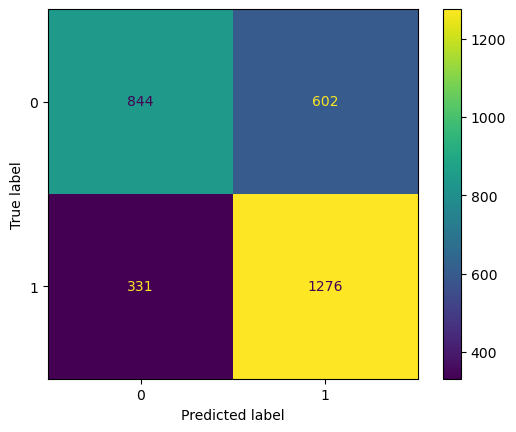

In [59]:
cm2 = confusion_matrix(y_test, rf_preds, labels=xgb_tuned_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_tuned_cv.classes_, 
                             )
disp.plot(values_format='');

**Important Note:** The model is almost twice as likely to predict a false positive than it is to predict a false negative. Therefore, type I errors are more common. This is less desirable, because it's better for a driver to be pleasantly surprised by a generous tip when they weren't expecting one than to be disappointed by a low tip when they were expecting a generous one. However, the overall performance of this model is satisfactory. 